![MLU Logo](../data/MLU_Logo.png)

# Assignment 1

Welcome to DTE!  These assignments are designed to give you practice on the practical implementation of decision trees.

## Related Reading
If you want to read more about these concepts, I'll be putting links here for you to find verious resources.  Many of them will be from our book [Understanding Random Forests](https://arxiv.org/pdf/1407.7502).
* [Understanding Random Forests](https://arxiv.org/pdf/1407.7502) Chapter 3. *Decision Trees*

## This Assignment's Goals
We have a couple of things to do this week:
* First, we want to see how decision trees behave
* Second, we want to get familiar with the dataset we will work with throughout this class.

In [1]:
#! pip install -q -r ../requirements.txt

## Question1 - Fit Decision Tree Classifier

Fit a decision tree classifier on your training dataset below.

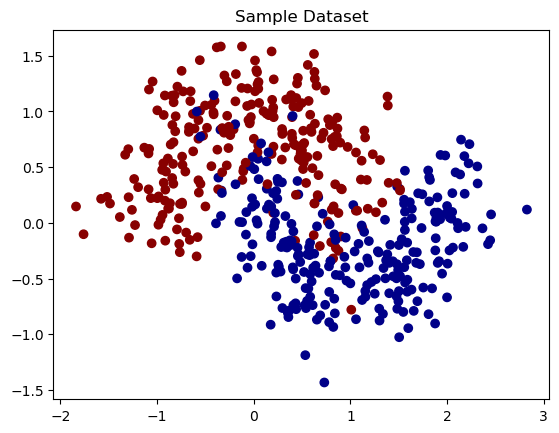

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons

dataset = make_moons(500, noise=0.3, random_state=0x1701a)

X, y = dataset
plt.scatter(X[:, 0], X[:, 1], cmap = ListedColormap(['#880000', '#000088']), c=y)
plt.title("Sample Dataset")

training_data = X[:400], y[:400]
validation_data = X[400:], y[400:]

Use the validation data to find the optimum max_depth of your tree. You can use __accuracy score__ on validation dataset.

In [2]:
### Code for Question 1 ###

#load the libraries
import sklearn 
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

#define the model and hyperparameters
dt_model = DecisionTreeClassifier().fit(training_data[0], training_data[1])
hyperparameters = {
    'max_depth': [i for i in range(1,25)]
}

#select best hyperparameters
rsearch = GridSearchCV(estimator = dt_model, param_grid = hyperparameters).fit(validation_data[0], validation_data[1])
best_params = rsearch.best_params_
print(best_params)

#fit the model
dt_model = DecisionTreeClassifier(**best_params).fit(training_data[0], training_data[1])

{'max_depth': 2}


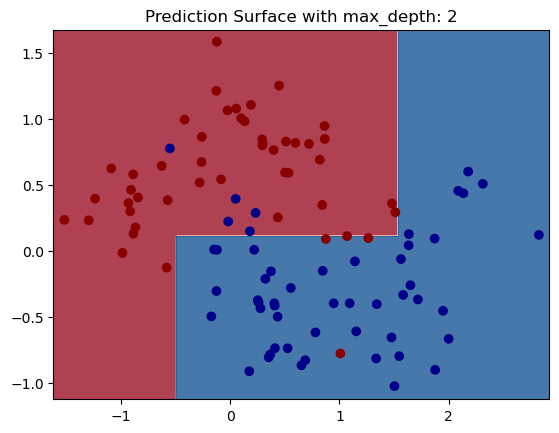

In [3]:
### Grab the model ###
from sklearn.tree import DecisionTreeClassifier
import numpy as np

def plot_surface(model,X,y,max_depth) :
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    X_grid = np.c_[xx.ravel(), yy.ravel()]
    
    # Predict
    z = model.predict(X_grid)
    z = z.reshape(xx.shape)
    
    # Plot
    plt.contourf(xx, yy, z, cmap='RdBu', alpha=.8)
    plt.scatter(X[:,0],X[:,1], cmap = ListedColormap(['#880000', '#000088']), c = y)
    plt.title("Prediction Surface with max_depth: {}".format(max_depth))
    
plot_surface(dt_model,validation_data[0],validation_data[1],2)
plt.show()

## Question2 - Final Project:
You will work with pet adoption data from Austin Animal Center. We joined two datasets that cover intake and outcome of animals. Intake data is available from [here](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) and outcome is from [here](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238). We want you to predict whether a pet is adopted within the 30 days stay time in the animal center.

Let's look at the fields in this dataset:
* Pet ID - Unique ID of pet
* Outcome Type - State of pet at the time of recording the outcome
* Sex upon Outcome - Sex of pet at outcome
* Name - Name of pet 
* Found Location - Found location of pet before entered the center
* Intake Type - Circumstances bringing the pet to the center
* Intake Condition - Health condition of pet when entered the center
* Pet Type - Type of pet
* Sex upon Intake - Sex of pet when entered the center
* Breed - Breed of pet 
* Color - Color of pet 
* Age upon Intake Days - Age of pet when entered the center (days)
* Time at Center - Time at center (0 = less than 30 days; 1 = more than 30 days). This is the value to predict.

Let's read our dataset using the Pandas library. This will load the data into a data frame, it acts like a data table.

In [13]:
import pandas as pd

df = pd.read_csv("../data/final_project/training.csv")

# Display first 10 rows
df.head(10)

Pet ID Outcome Type Sex upon Outcome         Name  \
0  A745079     Transfer          Unknown          NaN   
1  A801765     Transfer    Intact Female          NaN   
2  A667965     Transfer    Neutered Male          NaN   
3  A687551     Transfer      Intact Male          NaN   
4  A773004     Adoption    Neutered Male       *Boris   
5  A750059     Transfer    Neutered Male      *Joshua   
6  A665653     Transfer      Intact Male          NaN   
7  A777411     Adoption    Neutered Male  *Fuzzinator   
8  A708637     Transfer    Intact Female          NaN   
9  A747638     Adoption    Neutered Male   *Remington   

                              Found Location Intake Type Intake Condition  \
0           7920 Old Lockhart in Travis (TX)       Stray           Normal   
1              5006 Table Top in Austin (TX)       Stray           Normal   
2            14100 Thermal Dr in Austin (TX)       Stray           Normal   
3           5811 Cedardale Dr in Austin (TX)       Stray           Normal   
4  Highway 290 And Arterial A in Austin (TX)       Stray           Normal   
5    William Cannon And Jones in Austin (TX)       Stray           Normal   
6            2900 Sunridge Dr in Austin (TX)       Stray           Normal   
7                 2802 Monero in Austin (TX)       Stray           Normal   
8     1101 1/2 Tillery Street in Austin (TX)       Stray           Normal   
9   Hornsby St And W Caddo St in Austin (TX)       Stray           Normal   

  Pet Type Sex upon Intake                         Breed              Color  \
0      Cat         Unknown        Domestic Shorthair Mix               Blue   
1      Cat   Intact Female            Domestic Shorthair  Brown Tabby/White   
2      Dog   Neutered Male       Chihuahua Shorthair Mix          Brown/Tan   
3      Cat     Intact Male        Domestic Shorthair Mix        Brown Tabby   
4      Dog     Intact Male       Chihuahua Shorthair Mix     Tricolor/Cream   
5      Dog   Neutered Male  Great Pyrenees/Border Collie        Black/White   
6      Cat     Intact Male        Domestic Shorthair Mix  Brown Tabby/White   
7      Cat     Intact Male        Domestic Shorthair Mix        Brown Tabby   
8      Cat   Intact Female        Domestic Shorthair Mix             Torbie   
9      Dog     Intact Male               Anatol Shepherd          Black/Tan   

   Age upon Intake Days  Time at Center  
0                     3               0  
1                    28               0  
2                  1825               0  
3                    28               0  
4                   365               0  
5                   730               0  
6                    30               0  
7                    60               0  
8                   730               0  
9                   730               0

We didn't do any data cleaning for you, so you'll need to spend a bit of time doing that in order to get the dataset ready to start investigating.

In [5]:
# Test data
test_df = pd.read_csv("../data/final_project/test_features.csv")

test_df.head()

Pet ID     Outcome Type Sex upon Outcome  Name  \
0  A782657         Adoption    Spayed Female   NaN   
1  A804622         Adoption    Neutered Male   NaN   
2  A786693  Return to Owner    Neutered Male  Zeus   
3  A693330         Adoption    Spayed Female  Hope   
4  A812431         Adoption    Neutered Male   NaN   

                                Found Location      Intake Type  \
0           1911 Dear Run Drive in Austin (TX)            Stray   
1              702 Grand Canyon in Austin (TX)            Stray   
2                                  Austin (TX)    Public Assist   
3  Levander Loop & Airport Blvd in Austin (TX)            Stray   
4                                  Austin (TX)  Owner Surrender   

  Intake Condition Pet Type Sex upon Intake                           Breed  \
0           Normal      Dog   Intact Female          Labrador Retriever Mix   
1           Normal      Dog     Intact Male           Boxer/Anatol Shepherd   
2           Normal      Dog   Neutered Male  Australian Cattle Dog/Pit Bull   
3           Normal      Dog   Intact Female                Miniature Poodle   
4          Injured      Cat     Intact Male              Domestic Shorthair   

            Color  Age upon Intake Days  
0           Black                    60  
1  Brown/Tricolor                    60  
2     Black/White                  3285  
3            Gray                  1825  
4      Blue/White                   210

In [92]:
### Code for Question 2 ###

#libraries
import sklearn 
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, PredefinedSplit, train_test_split

#data cleaning
def data_transform(df):
    df = df[df['Outcome Type'].notna()] #remove invalid y-value rows
    y = df[['Outcome Type']]
    
    #proportion of preed at shelter for more than 30 days
    prob_longstay = df[['Pet Type', 'Breed', 'Time at Center']].groupby(by=['Pet Type', 'Breed'], as_index = False).mean(numeric_only = True).rename(columns={'Time at Center':'Proportion Long Stay'})
    df = df.merge(prob_longstay, how='left', on=['Pet Type', 'Breed']) 
    df['Proportion Long Stay'] = df['Proportion Long Stay'].apply(lambda x: 0.5 if pd.isna(x)else x)
    
    x = df[['Sex upon Outcome', 'Intake Type', 'Intake Condition', 'Pet Type', 'Sex upon Intake',
            'Age upon Intake Days', 'Proportion Long Stay']]
    
    #breed and colour
    x['Mix_Breed'] = df['Breed'].apply(lambda x: 1 if 'Mix' in x or '/' in x else 0)
    #x[['Breed1', 'Breed2', 'Breed3']] = df['Breed'].apply(lambda x: pd.Series(sorted(str(x).split("/")))) #split breed in 3 categories
    #x[['Color1', 'Color2']] = df['Color'].apply(lambda x: pd.Series(sorted(str(x).split("/")))) #split color into 2 categories
    
    #has a name
    x['Has_Name'] = df['Name'].apply(lambda x: 1 if pd.isna(x) else 0) #does animal have a name
    
    #convert categorical to boolean
    x = pd.get_dummies(x,drop_first=True) 
        
    return y, x

y, x = data_transform(pd.concat([df, test_df], axis = 0)) #combine data sets together so conversion of categorical vars includes all
y_train = y.iloc[:df.shape[0],:]
x_train = x.iloc[:df.shape[0],:]
y_test = y.iloc[df.shape[0]:,:]
x_test = x.iloc[df.shape[0]:,:]

#create validation set
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.33)


C:\Users\micha\AppData\Local\Temp\ipykernel_9944\1498719436.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Mix_Breed'] = df['Breed'].apply(lambda x: 1 if 'Mix' in x or '/' in x else 0)
C:\Users\micha\AppData\Local\Temp\ipykernel_9944\1498719436.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Has_Name'] = df['Name'].apply(lambda x: 1 if pd.isna(x) else 0) #does animal have a name


# Decision Tree

In [75]:
dt_model = DecisionTreeClassifier()
hyperparameters = {
    'max_depth': [i for i in range(1,15)],
    #'min_samples_split': [10, 20, 30],
    'class_weight':['balanced']
}

#select best hyperparameters
split = PredefinedSplit(np.concatenate([np.repeat(-1, x_train.shape[0]), np.repeat(0, x_valid.shape[0])]))
rsearch = GridSearchCV(estimator = dt_model, param_grid = hyperparameters, cv = split, return_train_score=False).fit(pd.concat([x_train, x_valid]), pd.concat([y_train, y_valid]))
best_params = rsearch.best_params_
print(best_params)

#fit the model
dt_model = DecisionTreeClassifier(**best_params).fit(x_train, y_train)

{'class_weight': 'balanced', 'max_depth': 14}


C:\Users\micha\AppData\Local\Temp\ipykernel_9944\2910113566.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels = x_train.columns, rotation=90)


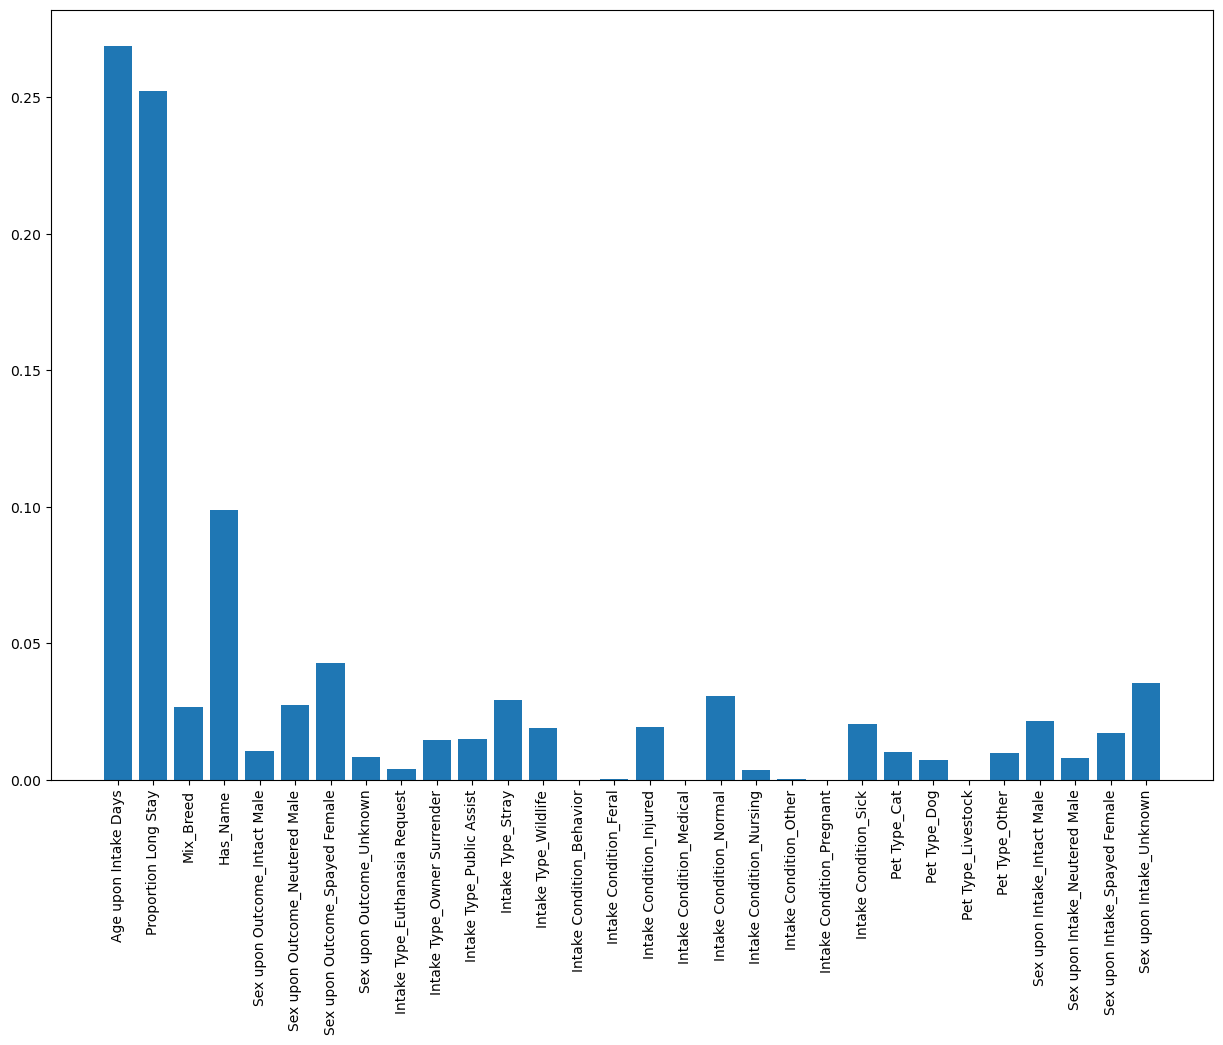

In [76]:
#feature imporance
fig = plt.figure(figsize=[15,10])
ax = fig.add_subplot(1, 1, 1)
feature_importance = pd.Series(dt_model.feature_importances_)
plt.bar(x = x_train.columns, height = feature_importance)
ax.set_xticklabels(labels = x_train.columns, rotation=90)
print('')

Train Summary Statistics:
                 precision    recall  f1-score   support

       Adoption       0.86      0.67      0.75     19930
           Died       0.12      0.68      0.21       537
       Disposal       0.16      0.78      0.26       259
     Euthanasia       0.76      0.52      0.62      3804
        Missing       0.01      1.00      0.03        27
       Relocate       0.20      1.00      0.33         7
Return to Owner       0.58      0.78      0.67      6926
      Rto-Adopt       0.04      0.92      0.07       184
       Transfer       0.88      0.51      0.64     16256

       accuracy                           0.62     47930
      macro avg       0.40      0.76      0.40     47930
   weighted avg       0.80      0.62      0.68     47930

Test Summary Statistics:
                 precision    recall  f1-score   support

       Adoption       0.81      0.63      0.71      9934
           Died       0.05      0.28      0.08       247
       Disposal       0.11      0

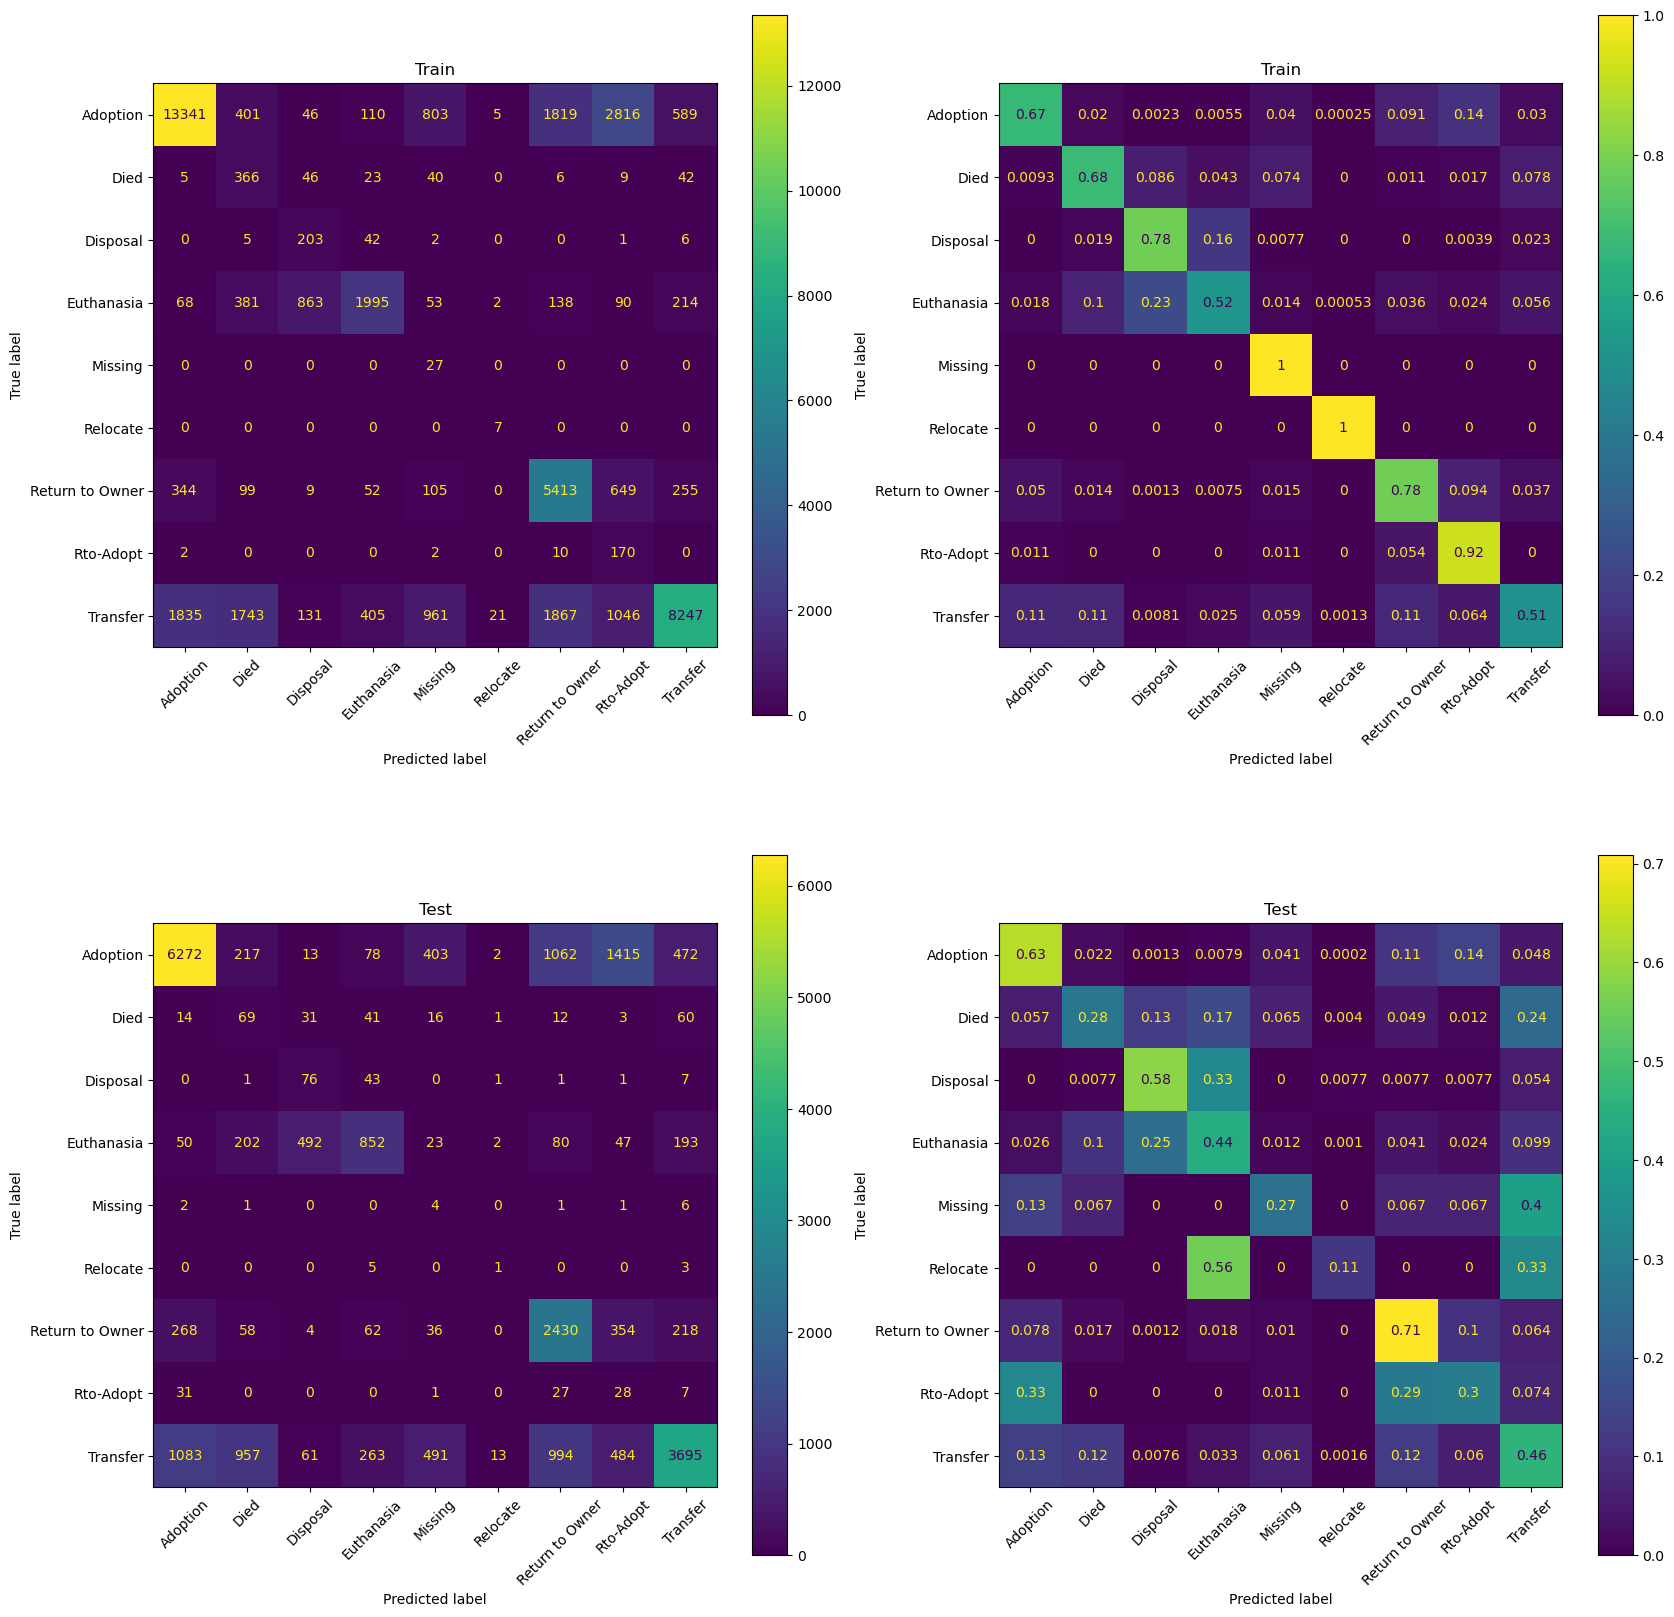

In [77]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

y_pred = dt_model.predict(x_train)
cm=confusion_matrix(y_train, y_pred)
cm_normal=confusion_matrix(y_train, y_pred, normalize='true')

fig = plt.figure(figsize=[20,20])
ax = fig.add_subplot(2, 2, 1)
ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = np.unique(y_train.values)).plot(ax=ax)
ax.set_xticklabels(labels = np.unique(y_train.values), rotation=45)
ax.set_title('Train')

ax = fig.add_subplot(2, 2, 2)
ConfusionMatrixDisplay(confusion_matrix = cm_normal, display_labels = np.unique(y_train.values)).plot(ax=ax)
ax.set_xticklabels(labels = np.unique(y_train.values), rotation=45)
ax.set_title('Train')

print("Train Summary Statistics:")
print(classification_report(y_train, y_pred, target_names=np.unique(y_train.values)))

y_pred = dt_model.predict(x_test)
cm=confusion_matrix(y_test, y_pred)
cm_normal=confusion_matrix(y_test, y_pred, normalize='true')

ax = fig.add_subplot(2, 2, 3)
ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = np.unique(y_train.values)).plot(ax=ax)
ax.set_xticklabels(labels = np.unique(y_train.values), rotation=45)
ax.set_title('Test')

ax = fig.add_subplot(2, 2, 4)
ConfusionMatrixDisplay(confusion_matrix = cm_normal, display_labels = np.unique(y_train.values)).plot(ax=ax)
ax.set_xticklabels(labels = np.unique(y_train.values), rotation=45)
ax.set_title('Test')

print("Test Summary Statistics:")
print(classification_report(y_test, y_pred, target_names=np.unique(y_train.values)))

# Random Forrest

https://www.kaggle.com/code/rmabjish/austin-animal-center-wrangling-predicting

In [93]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
hyperparameters = {
    'n_estimators': [100, 300, 500],
    'max_depth': [i for i in range(1,15)],
    #'min_samples_split': [10, 20, 30],
    'class_weight':['balanced']
}

#select best hyperparameters
split = PredefinedSplit(np.concatenate([np.repeat(-1, x_train.shape[0]), np.repeat(0, x_valid.shape[0])]))
rsearch = GridSearchCV(estimator = rf_model, param_grid = hyperparameters, cv = split, return_train_score=False).fit(pd.concat([x_train, x_valid]), np.array(pd.concat([y_train, y_valid])).reshape(-1))
best_params = rsearch.best_params_
print(best_params)

#fit the model
rf_model = RandomForestClassifier(**best_params).fit(x_train, np.array(y_train).reshape(-1))

{'class_weight': 'balanced', 'max_depth': 14, 'n_estimators': 100}


C:\Users\micha\AppData\Local\Temp\ipykernel_9944\2910113566.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels = x_train.columns, rotation=90)


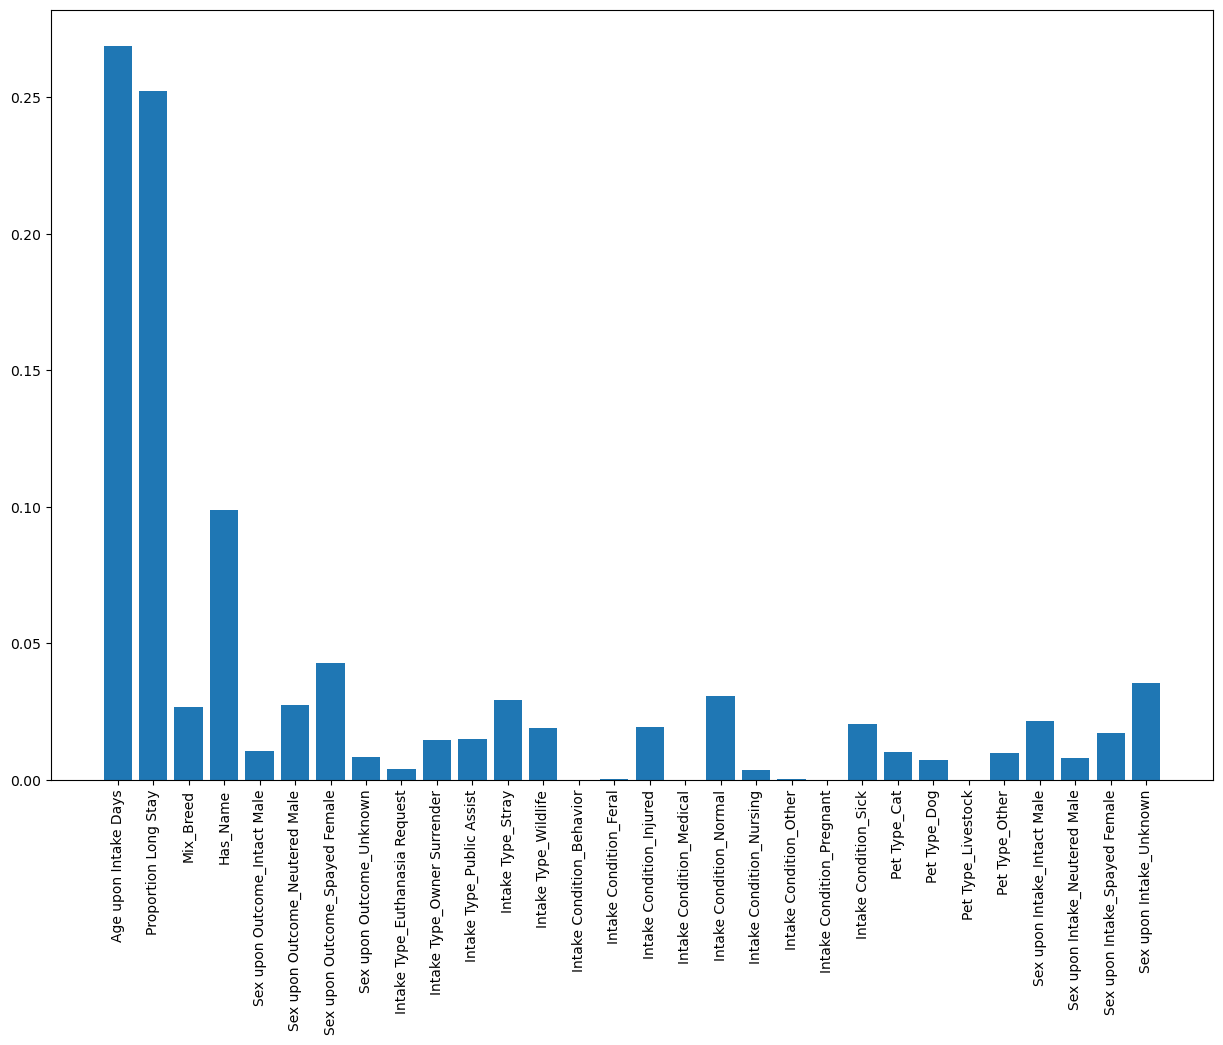

In [94]:
#feature imporance
fig = plt.figure(figsize=[15,10])
ax = fig.add_subplot(1, 1, 1)
feature_importance = pd.Series(dt_model.feature_importances_)
plt.bar(x = x_train.columns, height = feature_importance)
ax.set_xticklabels(labels = x_train.columns, rotation=90)
print('')

Train Summary Statistics:
                 precision    recall  f1-score   support

       Adoption       0.84      0.76      0.80     19995
           Died       0.19      0.62      0.29       533
       Disposal       0.17      0.77      0.28       253
     Euthanasia       0.81      0.59      0.68      3795
        Missing       0.02      0.92      0.04        24
       Relocate       0.12      1.00      0.22         8
Return to Owner       0.60      0.82      0.69      6913
      Rto-Adopt       0.05      0.85      0.09       176
       Transfer       0.90      0.58      0.70     16233

       accuracy                           0.69     47930
      macro avg       0.41      0.77      0.42     47930
   weighted avg       0.81      0.69      0.73     47930

Test Summary Statistics:
                 precision    recall  f1-score   support

       Adoption       0.82      0.73      0.77      9934
           Died       0.06      0.20      0.10       247
       Disposal       0.11      0

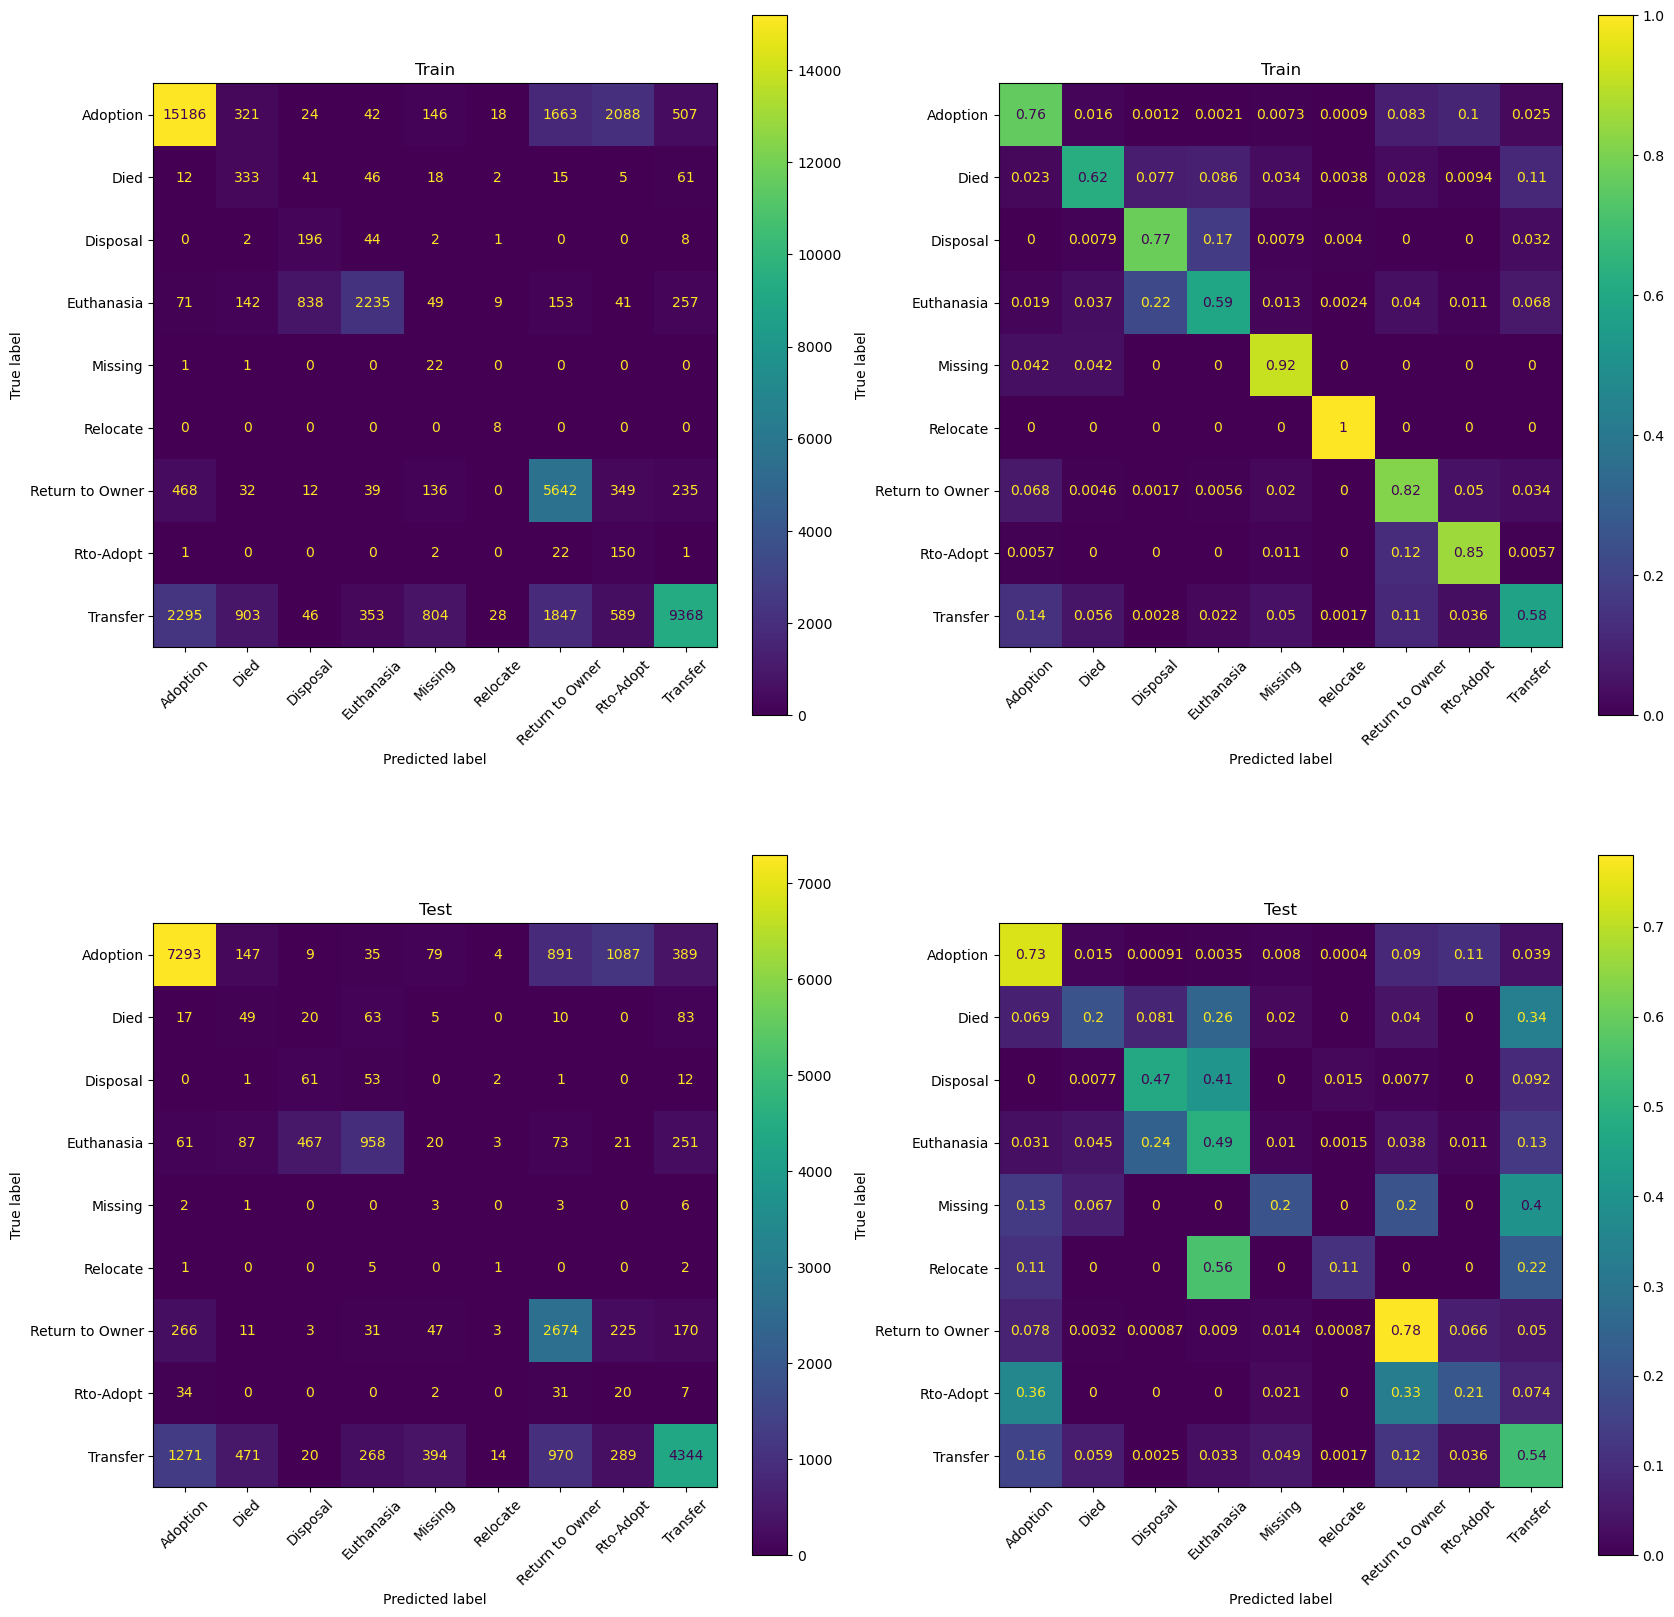

In [95]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

y_pred = rf_model.predict(x_train)
cm=confusion_matrix(y_train, y_pred)
cm_normal=confusion_matrix(y_train, y_pred, normalize='true')

fig = plt.figure(figsize=[20,20])
ax = fig.add_subplot(2, 2, 1)
ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = np.unique(y_train.values)).plot(ax=ax)
ax.set_xticklabels(labels = np.unique(y_train.values), rotation=45)
ax.set_title('Train')

ax = fig.add_subplot(2, 2, 2)
ConfusionMatrixDisplay(confusion_matrix = cm_normal, display_labels = np.unique(y_train.values)).plot(ax=ax)
ax.set_xticklabels(labels = np.unique(y_train.values), rotation=45)
ax.set_title('Train')

print("Train Summary Statistics:")
print(classification_report(y_train, y_pred, target_names=np.unique(y_train.values)))

y_pred = rf_model.predict(x_test)
cm=confusion_matrix(y_test, y_pred)
cm_normal=confusion_matrix(y_test, y_pred, normalize='true')

ax = fig.add_subplot(2, 2, 3)
ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = np.unique(y_train.values)).plot(ax=ax)
ax.set_xticklabels(labels = np.unique(y_train.values), rotation=45)
ax.set_title('Test')

ax = fig.add_subplot(2, 2, 4)
ConfusionMatrixDisplay(confusion_matrix = cm_normal, display_labels = np.unique(y_train.values)).plot(ax=ax)
ax.set_xticklabels(labels = np.unique(y_train.values), rotation=45)
ax.set_title('Test')

print("Test Summary Statistics:")
print(classification_report(y_test, y_pred, target_names=np.unique(y_train.values)))